# 01. Prepare Problem

A fintech company want to reduce their churn rate by identifying their user who will be leaving soon by reminding them with the value they are getting with the product and may also grant some discount on their annual subscription. This discount may not be granted for every users as it may impact the companys revenue so it has to be on a selective one

## Question : 

Through the Financial analysis of the data given by the company, classify the user into "VeryLikely" and "Non-Likely" to churn

> ### 1.1 Load Libraries

In [1]:
import os
os.chdir('D:\\data\\ChurnData')

import pandas as pd
pd.set_option('display.max_columns',500)

import warnings
warnings.filterwarnings('ignore')

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import pally as pal

> ### 1.2 Load Data

In [2]:
data = pd.read_csv('churn_data.csv')

# 02. Summarize Data

In [3]:
data.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,96,0,0,5,1,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,285,0,0,9,1,0,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,74,0,0,26,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,0,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,1.0,0.03,0


In [4]:
target = data['churn']
del data['churn']

In [5]:
pal.eda.print_null_cntNpct([data])

Total Missing Features : 3.

                Missing_Count  Missing_Percentage
credit_score             8031            0.297444
rewards_earned           3227            0.119519
age                         4            0.000148


[credit_score] : we cannot just simply impute missing values with zero as it mean's the user is having credit score zero.
* We can add a missing indicator and impute the missing values with median, as these all users is the member of the app
* Other one is we can predict this missing feature. but we will do this in more advance stage

[rewards_earned] : This feature is a inhouse feature and a missing value in this indicate that user have not earned any rewards

[age] : since age is missing for very less fields, we can just impute it with median value

**Lets begin with missing value imputation in next section**

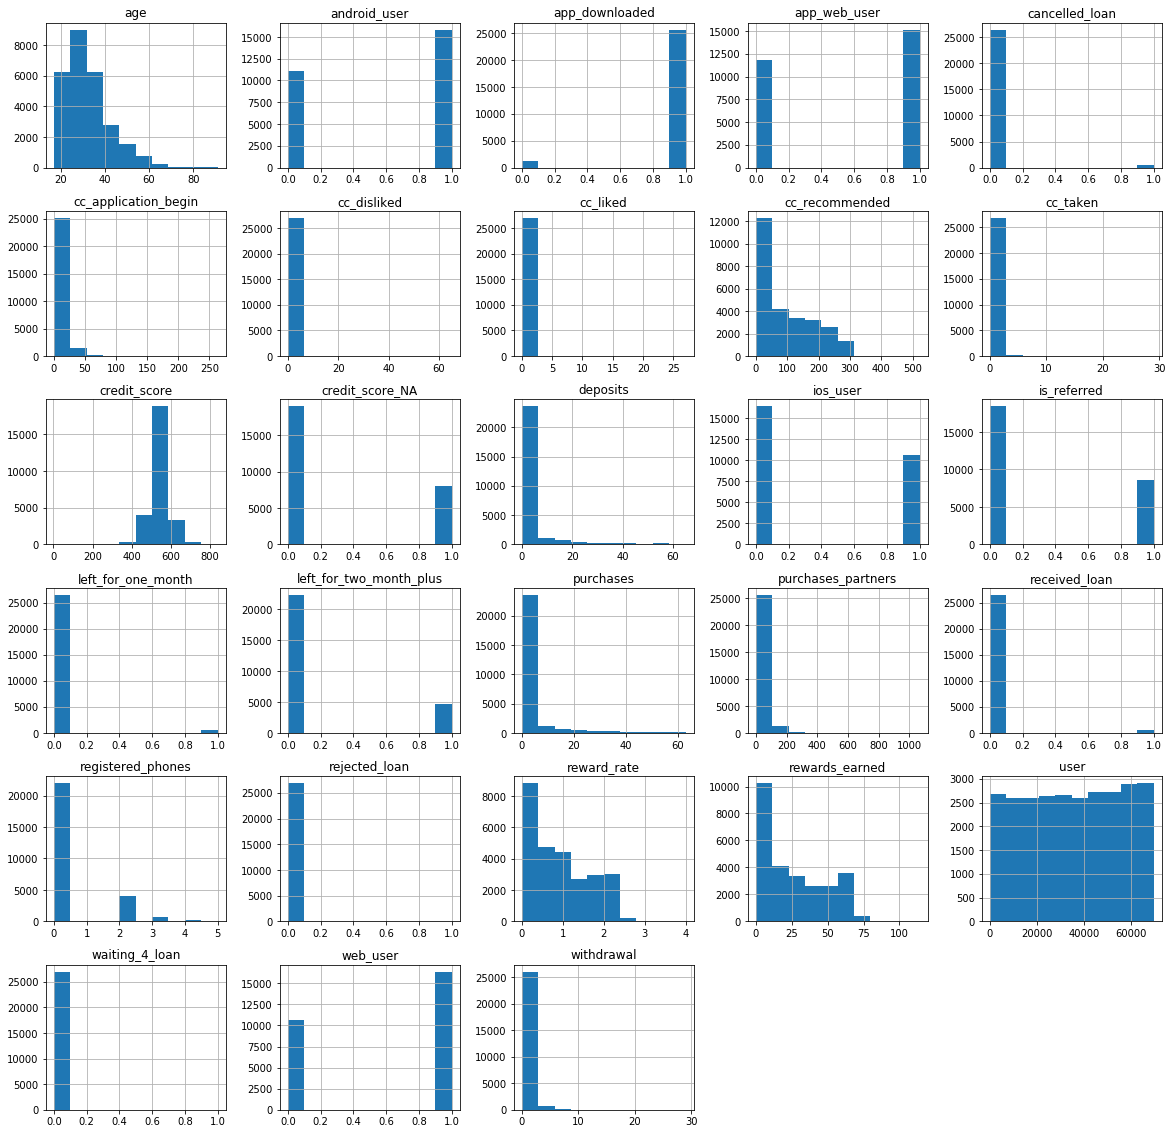

In [33]:
plt.rcParams['figure.figsize'] = (20,20)
data.hist()
plt.show()

In [6]:
# lets find out the binary features for ploting pie chart
binary_feature = [i for i in data.columns if data[i].nunique() == 2]

In [7]:
binary_feature

['app_downloaded',
 'web_user',
 'app_web_user',
 'ios_user',
 'android_user',
 'waiting_4_loan',
 'cancelled_loan',
 'received_loan',
 'rejected_loan',
 'left_for_two_month_plus',
 'left_for_one_month',
 'is_referred']

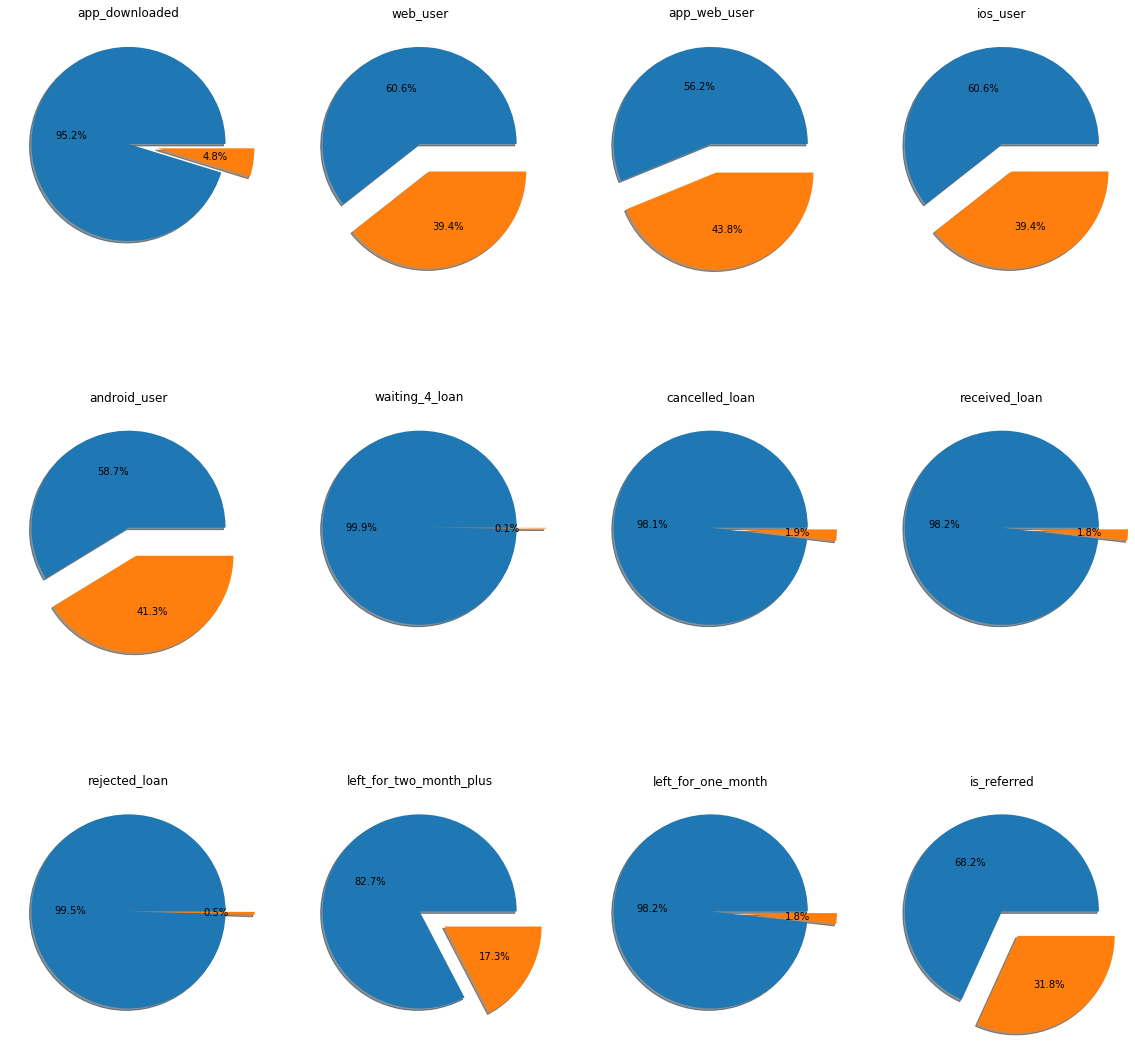

In [7]:
plt.rcParams['figure.figsize']=(20,20)
counter = 1
for i in binary_feature:
    plt.subplot(np.ceil(len(binary_feature)/4),4,counter)
    f = plt.gca()
    f.set_title(i)
    
    vals = data[i].value_counts(normalize=True)
    
    plt.pie(vals,explode=[0,0.3],autopct='%1.1f%%',shadow=True)
    counter+=1


# 03. Prepare Data

> ### 3.1 Data Cleaning and Imputation

In [8]:
# Handling credit_score
data['credit_score_NA'] = np.where(data["credit_score"].isnull(),1,0)

credit_score_median = data.credit_score.median()

data.credit_score.fillna(credit_score_median,inplace=True)

In [9]:
# Handling rewards_earned
data.rewards_earned.fillna(0,inplace=True)

In [10]:
# Handling Age
age_median = data.age.median()
data.age.fillna(age_median,inplace=True)

In [11]:
pal.eda.print_null_cntNpct([data])

Total Missing Features : 0.

Empty DataFrame
Columns: [Missing_Count, Missing_Percentage]
Index: []


In [19]:
# Null feature taken care

> ### 3.2 Cardinality and Rare value reduction

In [21]:
cat_feature = data.select_dtypes(include='object').columns

In [13]:
pal.eda.print_cardinalityNdifference(data,data,cat_feature)

->Cardinality of housing: 3 
    Left_Count    Left_%  Right_Count   Right_%
O       2171.0  0.080407       2171.0  0.080407
R      10969.0  0.406259      10969.0  0.406259
na     13860.0  0.513333      13860.0  0.513333
 
Difference : set()
-------------------------------------------------------
->Cardinality of payment_type: 5 
              Left_Count    Left_%  Right_Count   Right_%
Bi-Weekly        12716.0  0.470963      12716.0  0.470963
Monthly           2656.0  0.098370       2656.0  0.098370
Semi-Monthly      2440.0  0.090370       2440.0  0.090370
Weekly            5289.0  0.195889       5289.0  0.195889
na                3899.0  0.144407       3899.0  0.144407
 
Difference : set()
-------------------------------------------------------
->Cardinality of zodiac_sign: 13 
             Left_Count    Left_%  Right_Count   Right_%
Aquarius         2117.0  0.078407       2117.0  0.078407
Aries            2001.0  0.074111       2001.0  0.074111
Cancer           2424.0  0.089778     

> ### 3.3 Feature Analysis

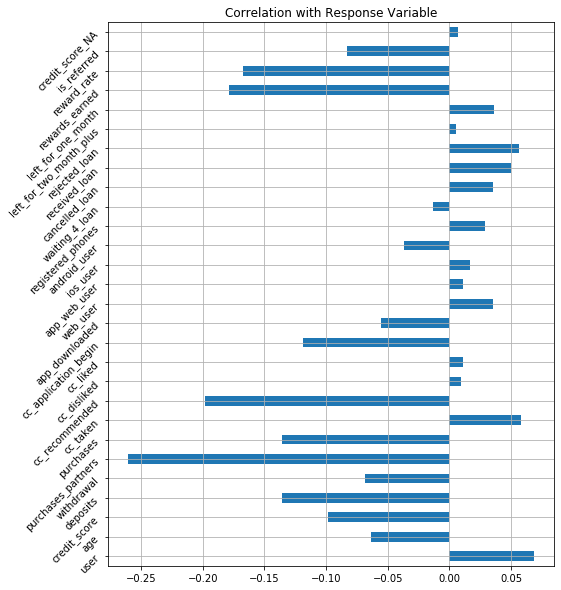

In [12]:
data.corrwith(target).plot.barh(figsize=(8,10),rot=45,title='Correlation with Response Variable',grid=True)

Mostly there is **Negative weak correlation** with the target variable with some **Positive correlation with very weak strength**.

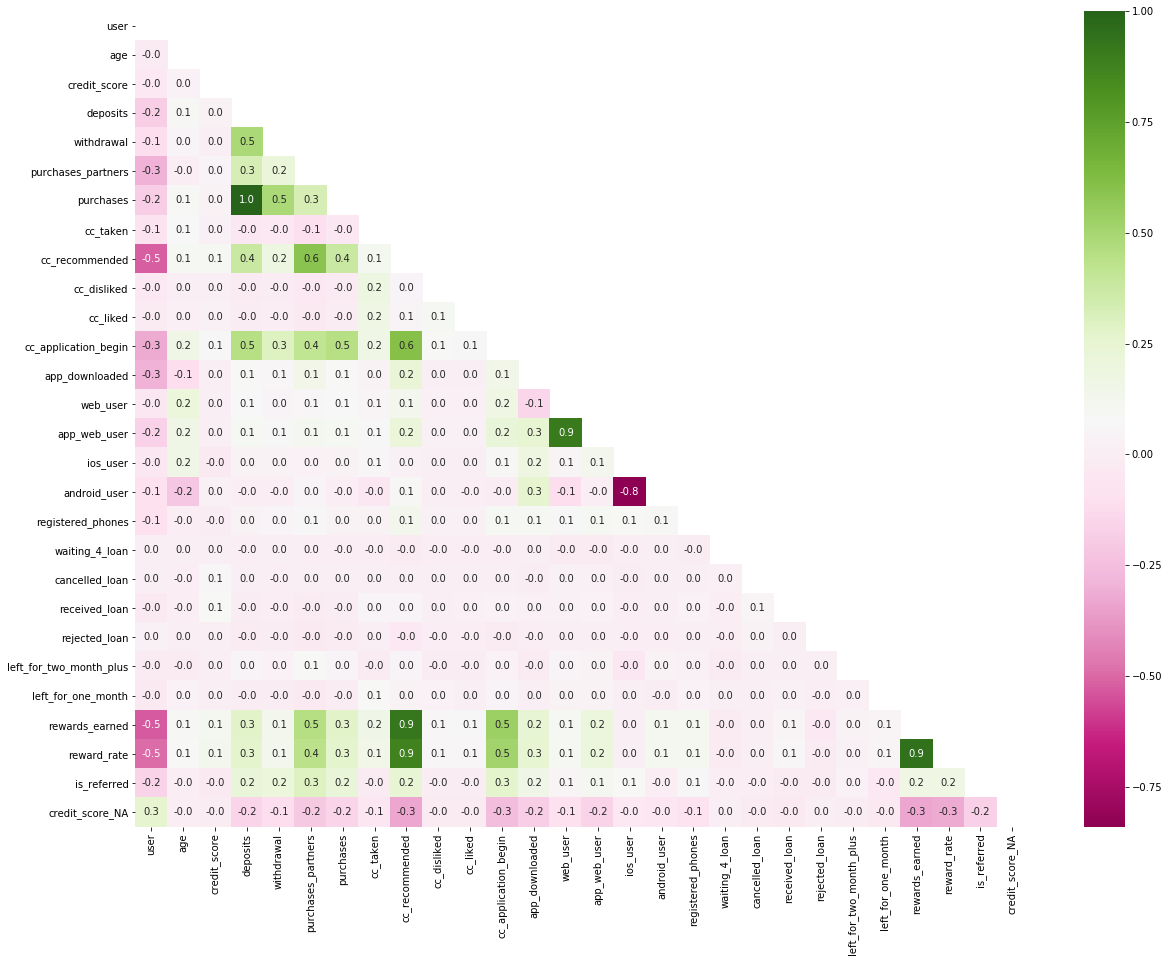

In [13]:
plt.rcParams['figure.figsize'] =(20,15)
sns.heatmap(data.corr(),annot=True,cmap='PiYG',fmt='.1f',mask=np.triu(np.ones_like(data.corr())))
plt.show()

Reducing Correlated feature
drop 
* ['rewards_earned','reward_rate','ios_user','app_web_user','deposits']

In [14]:
for i in ['rewards_earned','reward_rate','ios_user','app_web_user','deposits']:
    del data[i]

> ### 3.4 Categorical Encoding

1. Linear : target guided encoding
2. Non Linear : k - 1 length OneHotEncoding
3. Tree : k length OneHotEncoding

>> ### Linear Encoding
>>> #### One Hot

In [15]:
# Lets do encoding for specific category
df_linear = data.copy(deep=True)
df_tree = data.copy(deep=True)

In [16]:
df_linear_one_hot = pd.get_dummies(df_linear,drop_first=True)

In [17]:
df_linear_one_hot.head()   # Type 1

,user,age,credit_score,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,is_referred,credit_score_NA,housing_R,housing_na,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly,payment_type_na,zodiac_sign_Aries,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo,zodiac_sign_na
0,55409,37.0,542.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,23547,28.0,486.0,0,1,0,0,96,0,0,5,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,58313,35.0,561.0,2,86,47,0,285,0,0,9,1,0,1,2,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,8095,26.0,567.0,3,38,25,0,74,0,0,26,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,61353,27.0,542.0,0,2,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


>>> #### Target Guided

**Conclusion:** payment_type and zodiac_sign are not in the linear relation with target

In [22]:
from feature_engine.categorical_encoders import MeanCategoricalEncoder

In [23]:
cat_feature = cat_feature.tolist()

In [24]:
encoder = MeanCategoricalEncoder(variables=cat_feature)

In [25]:
df_linear.shape

(27000, 26)

In [26]:
df_linear = encoder.fit_transform(df_linear,y=target)

>> #### Encoding for Nonlinear

Use the Target guided encoding for training NonLinear Machine Learning model

>> #### Encoding for Trees

In [27]:
df_tree = pd.get_dummies(df_tree)

So, we have total 4 frames for checking performance :

* Linear
 1. df_linear_one_hot
 2. df_linear
 
* Non-Linear
 1. df_linear
 
* Tree
 1. df_tree

> ### 3.5 Scaling

In [28]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()

In [29]:
featurelist = df_linear.columns
df_linear = pd.DataFrame(rs.fit_transform(df_linear),columns=featurelist)

In [30]:
featurelist = df_linear_one_hot.columns
df_linear_one_hot = pd.DataFrame(rs.fit_transform(df_linear_one_hot),columns=featurelist)

In [31]:
featurelist = df_tree.columns
df_tree = pd.DataFrame(rs.fit_transform(df_tree),columns=featurelist)

> ### 3.8 Feature Selection

> ### 3.9 Data Discovery

# 04. Evaluate Algorithms

> ### 4.1 Linear Models

In [32]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier,RidgeClassifierCV,SGDClassifier,Perceptron

In [33]:
algo_list = []

algo_list.append(('LogisticRegression',LogisticRegression()))
algo_list.append(('PassiveAggressiveClassifier',PassiveAggressiveClassifier()))
algo_list.append(('RidgeClassifierCV',RidgeClassifierCV()))
algo_list.append(('SGDClassifier',SGDClassifier()))
algo_list.append(('Perceptron',Perceptron()))

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_linear_one_hot,target,test_size=0.2,random_state=0)

In [35]:
# evaluate each model in turn 
results = [] 
names = [] 
scoring = 'accuracy'
for name, model in algo_list:
    kfold = KFold(n_splits=10, random_state=10)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LogisticRegression: 0.658981 (0.012096)
PassiveAggressiveClassifier: 0.570370 (0.040601)
RidgeClassifierCV: 0.654491 (0.011849)
SGDClassifier: 0.641389 (0.013272)
Perceptron: 0.603472 (0.015086)


> ### 4.2 Non-Linear Models

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,NuSVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis

In [37]:
algo_list = []

algo_list.append(('KNeighborsClassifier',KNeighborsClassifier()))
#algo_list.append(('SVC',SVC()))
#algo_list.append(('NuSVC',NuSVC()))
algo_list.append(('GaussianNB',GaussianNB()))
algo_list.append(('BernoulliNB',BernoulliNB()))
algo_list.append(('LinearDiscriminantAnalysis',LinearDiscriminantAnalysis()))
algo_list.append(('QuadraticDiscriminantAnalysis',QuadraticDiscriminantAnalysis()))

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_linear,target,test_size=0.2,random_state=0)

In [39]:
# evaluate each model in turn 
results = [] 
names = [] 
scoring = 'accuracy'
for name, model in algo_list:
    kfold = KFold(n_splits=10, random_state=10)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNeighborsClassifier: 0.619444 (0.006307)
GaussianNB: 0.619120 (0.006448)
BernoulliNB: 0.634167 (0.011624)
LinearDiscriminantAnalysis: 0.654028 (0.010567)
QuadraticDiscriminantAnalysis: 0.628287 (0.010332)


> ### 4.3 Tree Models

In [40]:
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier

In [41]:
algo_list = []

algo_list.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
algo_list.append(('ExtraTreeClassifier',ExtraTreeClassifier()))

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_tree,target,test_size=0.2,random_state=0)

In [43]:
# evaluate each model in turn 
results = [] 
names = [] 
scoring = 'accuracy'
for name, model in algo_list:
    kfold = KFold(n_splits=10, random_state=10)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

DecisionTreeClassifier: 0.631667 (0.009734)
ExtraTreeClassifier: 0.608426 (0.015036)


> ### 4.4 Ensemble

In [44]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [45]:
algo_list = []

algo_list.append(('RandomForestClassifier',RandomForestClassifier()))
algo_list.append(('AdaBoostClassifier',AdaBoostClassifier()))
algo_list.append(('BaggingClassifier',BaggingClassifier()))
algo_list.append(('ExtraTreesClassifier',ExtraTreesClassifier()))
algo_list.append(('GradientBoostingClassifier',GradientBoostingClassifier()))

In [46]:
# evaluate each model in turn 
results = [] 
names = [] 
scoring = 'accuracy'
for name, model in algo_list:
    kfold = KFold(n_splits=10, random_state=10)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RandomForestClassifier: 0.703472 (0.011612)
AdaBoostClassifier: 0.675509 (0.012458)
BaggingClassifier: 0.678194 (0.008285)
ExtraTreesClassifier: 0.680880 (0.009506)
GradientBoostingClassifier: 0.687083 (0.010597)


> ### 4.5 Voting

>> #### Hard Voting

In [47]:
from sklearn.ensemble import VotingClassifier

In [59]:
# Selecting only those algo that yield high accuracy
voter = VotingClassifier(estimators=[('RandomForestClassifier', RandomForestClassifier()),
                                     ('GradientBoostingClassifier', GradientBoostingClassifier()),
                                     ('ExtraTreesClassifier', ExtraTreesClassifier())
                                    ],voting='hard')

In [60]:
# Hard Voting
for name, model in zip(['RandomForestClassifier', 'GradientBoostingClassifier', 'ExtraTreesClassifier', 'HardVoting'],
                       [RandomForestClassifier(), GradientBoostingClassifier(), ExtraTreesClassifier(), voter]):
    scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), name))

Accuracy: 0.7004 (+/- 0.0083) [RandomForestClassifier]
Accuracy: 0.6875 (+/- 0.0074) [GradientBoostingClassifier]
Accuracy: 0.6796 (+/- 0.0062) [ExtraTreesClassifier]
Accuracy: 0.7033 (+/- 0.0091) [HardVoting]


>> #### Soft Voting

In [61]:
# Selecting only those algo that yield high accuracy
voter = VotingClassifier(estimators=[('RandomForestClassifier', RandomForestClassifier()),
                                     ('GradientBoostingClassifier', GradientBoostingClassifier()),
                                     ('ExtraTreesClassifier', ExtraTreesClassifier())
                                    ],voting='soft',
                         weights=[0.3,0.4,0.3]
                        )

In [62]:
for name, model in zip(['SoftVoting'],
                       [voter]):
    scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), name))

Accuracy: 0.7051 (+/- 0.0090) [SoftVoting]


> ### 4.6 Stacking

In [54]:
from sklearn.ensemble import StackingClassifier

In [65]:
stack = StackingClassifier(estimators=[('RandomForestClassifier', RandomForestClassifier()),
                                     ('GradientBoostingClassifier', GradientBoostingClassifier())
                                      ],final_estimator=RandomForestClassifier()
                          )

In [66]:
scores = cross_val_score(stack, x_train, y_train, scoring='accuracy', cv=5)
print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), 'Stacking'))

Accuracy: 0.6295 (+/- 0.0067) [Stacking]


#### Soft Voting is giving us the maximum accuracy.

# 06. Finalize Model

In [67]:
# Selecting only those algo that yield high accuracy
voter = VotingClassifier(estimators=[('RandomForestClassifier', RandomForestClassifier()),
                                     ('GradientBoostingClassifier', GradientBoostingClassifier()),
                                     ('ExtraTreesClassifier', ExtraTreesClassifier())
                                    ],voting='soft',
                         weights=[0.3,0.4,0.3]
                        )

In [68]:
voter.fit(x_train,y_train)

VotingClassifier(estimators=[('RandomForestClassifier',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fractio

In [69]:
y_pred = voter.predict(x_test)

In [70]:
from sklearn.metrics import confusion_matrix,classification_report

In [71]:
confusion_matrix(y_test,y_pred)

array([[2624,  535],
       [1028, 1213]], dtype=int64)

535 individuals were predicted to False which churned

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77      3159
           1       0.69      0.54      0.61      2241

    accuracy                           0.71      5400
   macro avg       0.71      0.69      0.69      5400
weighted avg       0.71      0.71      0.70      5400



We are getting more accuracy in predicting non-churn users i.e 83%
However, of all the total peoples who left, we predicted 54% right

### There is a need to improve this model